# Customer Segmentation and Classification

#### Problem:

User clickstream data and information about a group of hotels is provided.

#### Objective:

Segment users into 3 clusters and predict to which cluster a new customer belongs


In [64]:
#Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Tell iPython to include plots inline in the notebook
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [65]:
#Read dataset
globalData = pd.read_csv("globalTrain.csv")

#print globalData.head() # print the first 5 rows
globalData.head()

,Search ID,Booking Date,HotelCode,Age,Gender,Number of Rooms,Check in date,Check Out Date,Seen Price,isClicked,isBooked,Segment,HotelCode,City,Latitude,Longitude,Star Rating,TripAdvisor Rating
0,1,2013-04-04 08:32:15,724,18,female,1,2013-04-04,2013-04-05,7100,True,False,backpacker,724,melrude,47.245556,-92.416944,3,3.5
1,2,2013-04-04 08:32:15,463,18,female,1,2013-04-04,2013-04-05,11200,True,False,backpacker,463,fancy,36.366389,-88.654444,4,4.0
2,3,2013-04-04 08:32:15,704,18,female,1,2013-04-04,2013-04-05,11900,True,False,backpacker,704,sturry,51.283333,1.116667,3,4.5
3,4,2013-04-04 08:32:15,217,18,female,1,2013-04-04,2013-04-05,41200,False,False,backpacker,217,edmiston,36.778889,-119.539444,2,4.0
4,5,2013-04-04 08:32:15,570,18,female,1,2013-04-04,2013-04-05,9500,True,False,backpacker,570,lackawaxen,41.481944,-74.986389,4,3.5


In [66]:
#Checking variables data types
globalData.dtypes

Search ID               int64
Booking Date           object
 HotelCode              int64
 Age                    int64
 Gender                object
 Number of Rooms        int64
 Check in date         object
 Check Out Date        object
 Seen Price             int64
 isClicked               bool
 isBooked                bool
 Segment               object
HotelCode               int64
City                   object
Latitude              float64
Longitude             float64
Star Rating             int64
TripAdvisor Rating    float64
dtype: object

In [67]:
#Renaming columns and changing data types

globalData=globalData.rename(columns = {' HotelCode':'HotelCode'})
globalData=globalData.rename(columns = {' Age':'Age'})
globalData=globalData.rename(columns = {' Gender':'Gender'})
globalData=globalData.rename(columns = {' Number of Rooms':'Number of Rooms'})
globalData=globalData.rename(columns = {' Check in date':'Check in date'})
globalData=globalData.rename(columns = {' Check Out Date':'Check Out Date'})
globalData=globalData.rename(columns = {' Seen Price':'Seen Price'})
globalData=globalData.rename(columns = {' isClicked':'isClicked'})
globalData=globalData.rename(columns = {' isBooked':'isBooked'})
globalData=globalData.rename(columns = {' Segment':'Segment'})

globalData['Booking Date'] =  pd.to_datetime(globalData['Booking Date'])
globalData['Check in date'] =  pd.to_datetime(globalData['Check in date'])
globalData['Check Out Date'] =  pd.to_datetime(globalData['Check Out Date'])
globalData['isClicked'] =  globalData['isClicked'].astype(str)
globalData['isBooked'] =  globalData['isBooked'].astype(str)

globalData['Stay Period'] = (globalData['Check Out Date'] - globalData['Check in date'])/np.timedelta64(1, 'D');
globalData['Travel Gap'] = (globalData['Check in date'] - globalData['Booking Date'])/np.timedelta64(1, 'D');


In [68]:
globalData.head()

,Search ID,Booking Date,HotelCode,Age,Gender,Number of Rooms,Check in date,Check Out Date,Seen Price,isClicked,isBooked,Segment,HotelCode,City,Latitude,Longitude,Star Rating,TripAdvisor Rating,Stay Period,Travel Gap
0,1,2013-04-04 08:32:15,724,18,female,1,2013-04-04,2013-04-05,7100,True,False,backpacker,724,melrude,47.245556,-92.416944,3,3.5,1.0,-0.355729
1,2,2013-04-04 08:32:15,463,18,female,1,2013-04-04,2013-04-05,11200,True,False,backpacker,463,fancy,36.366389,-88.654444,4,4.0,1.0,-0.355729
2,3,2013-04-04 08:32:15,704,18,female,1,2013-04-04,2013-04-05,11900,True,False,backpacker,704,sturry,51.283333,1.116667,3,4.5,1.0,-0.355729
3,4,2013-04-04 08:32:15,217,18,female,1,2013-04-04,2013-04-05,41200,False,False,backpacker,217,edmiston,36.778889,-119.539444,2,4.0,1.0,-0.355729
4,5,2013-04-04 08:32:15,570,18,female,1,2013-04-04,2013-04-05,9500,True,False,backpacker,570,lackawaxen,41.481944,-74.986389,4,3.5,1.0,-0.355729


In [69]:
globalData.describe()

,Search ID,HotelCode,Age,Number of Rooms,Seen Price,HotelCode,Latitude,Longitude,Star Rating,TripAdvisor Rating,Stay Period,Travel Gap
count,162848.000000,162848.000000,162848.000000,162848.000000,1.628480e+05,162848.000000,162848.000000,162848.000000,162848.000000,162848.000000,162848.000000,162848.000000
mean,81424.500000,503.631239,31.976512,1.118626,2.887548e+04,503.631239,39.676968,-72.571233,3.810928,4.144279,2.523095,40.452700
std,47010.312656,288.705373,14.679818,0.442624,1.685715e+06,288.705373,8.464090,41.132882,0.730745,0.498001,1.953268,54.717154
min,1.000000,0.000000,18.000000,1.000000,-1.600000e+03,0.000000,-14.171667,-176.641667,1.000000,0.000000,1.000000,-0.988090
25%,40712.750000,254.000000,22.000000,1.000000,8.600000e+03,254.000000,34.846111,-90.598889,3.000000,4.000000,1.000000,5.251863
50%,81424.500000,507.000000,28.000000,1.000000,1.240000e+04,507.000000,39.218611,-81.130556,4.000000,4.000000,2.000000,19.499039
75%,122136.250000,754.000000,37.000000,1.000000,1.770000e+04,754.000000,43.493056,-75.005278,4.000000,4.500000,3.000000,53.033843
max,162848.000000,999.000000,80.000000,8.000000,3.311511e+08,999.000000,62.544444,158.314722,5.000000,5.000000,28.000000,479.734850


From the data, it is evident that the segment depends on,
1> Age, 2> Gender, 3> Number of rooms, 4> Seen price, 5> isCLicked, 6> isBooked, 7> Star Rating, 8> Trip Adviser Rating, 9> Stay period (Difference in days between Check out date and Check in date), 10 > Travel Gap  (Difference in days between booking date and check in date).
Therefore, there are 10 features as mentioned above. Some of the features have a string/object value, convert those to discretes ones an zeros. 

In [70]:
#Now separate training data
X_train=globalData.iloc[:,[3,4,5,8,9,10,16,17,18,19]];
#X_train=globalData.iloc[:,[3]];
X_train['Gender'] = X_train['Gender'].replace(['male', 'female'], [1, 0])
X_train['isClicked'] = X_train['isClicked'].replace(['True', 'False'], [1, 0])
X_train['isBooked'] = X_train['isBooked'].replace(['True', 'False'], [1, 0])
X_train[X_train < 0] = 0

In [71]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA

In [72]:
pca = PCA(n_components=10)
pca.fit(X_train)
# Print the components and the amount of variance in the data contained in each dimension
#print pca.components_
print(pca.explained_variance_ratio_)

[9.99999999e-01 1.05329442e-09 7.57287566e-11 1.22392571e-12
 2.25296960e-13 8.80978053e-14 8.45287761e-14 6.86137409e-14
 4.96749658e-14 1.11425796e-14]


In [73]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca = PCA(n_components=3)
reduced_data = pca.fit_transform(X_train)
print(reduced_data[:10]) #print upto 10 elements
print(pca.components_)
print(pca.explained_variance_ratio_)

[[-2.17756171e+04 -4.06302136e+01 -1.35604514e+01]
 [-1.76756171e+04 -4.06296106e+01 -1.35608497e+01]
 [-1.69756171e+04 -4.06296903e+01 -1.35600650e+01]
 [ 1.23243829e+04 -4.06275757e+01 -1.35577648e+01]
 [-1.93756171e+04 -4.06298145e+01 -1.35610057e+01]
 [-1.61756171e+04 -4.06294619e+01 -1.35605770e+01]
 [-1.99756171e+04 -4.06298391e+01 -1.35608445e+01]
 [-1.03756171e+04 -4.06290082e+01 -1.35604619e+01]
 [-1.95756171e+04 -4.06300321e+01 -1.35603345e+01]
 [-2.35756171e+04 -4.06306655e+01 -1.35598034e+01]]
[[-5.40301043e-08 -1.95380145e-09 -4.98571190e-10  1.00000000e+00
  -8.09557631e-10  2.33086186e-10  5.23225422e-09  1.57612211e-09
   9.57986790e-09 -8.20738300e-08]
 [ 1.04019990e-02 -4.78484678e-05  3.06806328e-04  8.25246189e-08
   3.86843950e-05  3.31918879e-06  2.01061826e-04  1.27154302e-04
   1.05488107e-02  9.99890177e-01]
 [ 9.99933612e-01 -2.94086062e-04  3.91167439e-04  5.31257792e-08
  -1.27377828e-04 -3.81233837e-06 -6.81877859e-04  1.31409155e-04
   4.77202065e-03 -1.04

In [74]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np

In [75]:
#Train the clustering algorythm

kmeans = KMeans(init='k-means++', n_clusters=3, n_init=10)
kmeans.fit(reduced_data)
y_kmeans = kmeans.predict(reduced_data)

In [76]:
reduced_data

array([[-2.17756171e+04, -4.06302136e+01, -1.35604514e+01],
       [-1.76756171e+04, -4.06296106e+01, -1.35608497e+01],
       [-1.69756171e+04, -4.06296903e+01, -1.35600650e+01],
       ...,
       [-2.01756171e+04,  3.40761713e+01, -5.32612056e+00],
       [-2.01756171e+04,  3.40764746e+01, -5.32686411e+00],
       [-2.18756171e+04,  3.40760061e+01, -5.32640396e+00]])

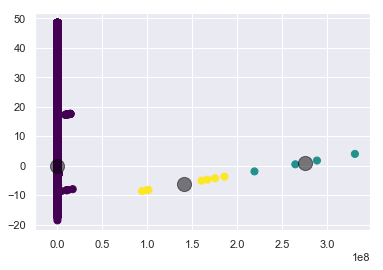

In [77]:
plt.scatter(reduced_data[:, 0], reduced_data[:, 2], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 2], c='black', s=200, alpha=0.5);

In [80]:
globalData['cluster'] = y_kmeans

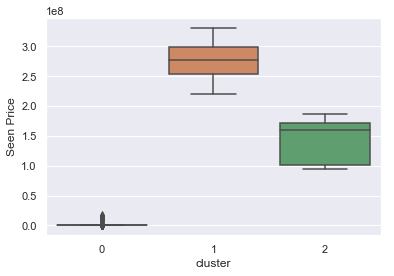

In [81]:
# Comparing Clusters
import seaborn as sns
 
sns.boxplot(x=globalData["cluster"], y=globalData["Seen Price"] )
plt.show()


In [82]:
globalData.columns

Index(['Search ID', 'Booking Date', 'HotelCode', 'Age', 'Gender',
       'Number of Rooms', 'Check in date', 'Check Out Date', 'Seen Price',
       'isClicked', 'isBooked', 'Segment', 'HotelCode', 'City', 'Latitude',
       'Longitude', 'Star Rating', 'TripAdvisor Rating', 'Stay Period',
       'Travel Gap', 'cluster'],
      dtype='object')

In [83]:
#Preprocessing for scaling
X =globalData.iloc[:,[3,4,5,8,9,10,16,17,18,19]];

X['Gender'] = X['Gender'].replace(['male', 'female'], [1, 0])
X['isClicked'] = X['isClicked'].replace(['True', 'False'], [1, 0])
X['isBooked'] = X['isBooked'].replace(['True', 'False'], [1, 0])

X.head()

,Age,Gender,Number of Rooms,Seen Price,isClicked,isBooked,Star Rating,TripAdvisor Rating,Stay Period,Travel Gap
0,18,0,1,7100,1,0,3,3.5,1.0,-0.355729
1,18,0,1,11200,1,0,4,4.0,1.0,-0.355729
2,18,0,1,11900,1,0,3,4.5,1.0,-0.355729
3,18,0,1,41200,0,0,2,4.0,1.0,-0.355729
4,18,0,1,9500,1,0,4,3.5,1.0,-0.355729


In [84]:
#Scaling values to 0-100

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
print(scaler.fit(X))

scaled_X = scaler.transform(X)
X1 = pd.DataFrame(scaled_X)
X1.columns = X.columns

X1.head()
X2 = X1*100
X2['cluster'] = y_kmeans
X2.describe()

MinMaxScaler(copy=True, feature_range=(0, 1))


,Age,Gender,Number of Rooms,Seen Price,isClicked,isBooked,Star Rating,TripAdvisor Rating,Stay Period,Travel Gap,cluster
count,162848.000000,162848.000000,162848.000000,162848.000000,162848.000000,162848.000000,162848.000000,162848.000000,162848.000000,162848.000000,162848.000000
mean,22.542761,50.851714,1.694657,0.009203,59.893275,3.273605,70.273200,82.885574,5.641093,8.620514,0.000111
std,23.677125,49.992899,6.323205,0.509044,49.011610,17.794548,18.268634,9.960018,7.234327,11.382264,0.014018
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.451613,0.000000,0.000000,0.003080,0.000000,0.000000,50.000000,80.000000,0.000000,1.298035,0.000000
50%,16.129032,100.000000,0.000000,0.004228,100.000000,0.000000,75.000000,80.000000,3.703704,4.261733,0.000000
75%,30.645161,100.000000,0.000000,0.005828,100.000000,0.000000,75.000000,90.000000,7.407407,11.237644,0.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,2.000000


In [85]:
#Groupng data into clusters

grouped = X2.groupby('cluster').agg({'Age': ['median'], 'Seen Price': ['median'], 'Star Rating': ['median'], 'TripAdvisor Rating': ['median'], 'Stay Period': ['median']})

In [86]:
grouped.reset_index()
grouped.columns = ['Age', 'Seen Price', 'Star Rating', 'TripAdvisor Rating', 'Stay Period']
grouped.head()

,Age,Seen Price,Star Rating,TripAdvisor Rating,Stay Period
cluster,,,,,
0,16.129032,0.004228,75.0,80.0,3.703704
1,0.000000,83.602489,100.0,90.0,11.111111
2,0.000000,48.465919,100.0,90.0,11.111111


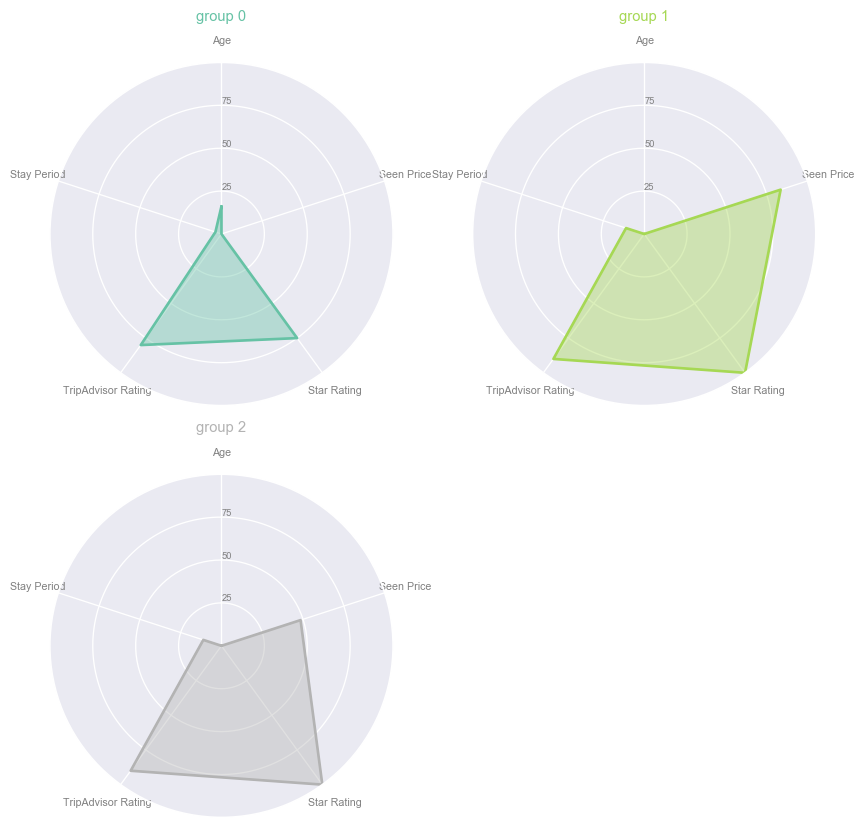

In [87]:
#Creating radar charts for clusters


# Libraries
import matplotlib.pyplot as plt
import pandas as pd
from math import pi

# Set data
df = pd.DataFrame({
'group': ['0','1','2'],
'Age': grouped['Age'].tolist(),
'Seen Price': grouped['Seen Price'].tolist(),
'Star Rating': grouped['Star Rating'].tolist(),
'TripAdvisor Rating': grouped['TripAdvisor Rating'].tolist(),
'Stay Period': grouped['Stay Period'].tolist(),
})

# ------- PART 1: Define a function that do a plot for one line of the dataset!

def make_spider( row, title, color):

# number of variable
    categories=list(df)[1:]
    N = len(categories)

# What will be the angle of each axis in the plot? (we divide the plot / number of variable)
    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]

# Initialise the spider plot
    ax = plt.subplot(2,2,row+1, polar=True, )

# If you want the first axis to be on top:
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)

# Draw one axe per variable + add labels labels yet
    plt.xticks(angles[:-1], categories, color='grey', size=8)

# Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([25,50,75], ["25","50","75"], color="grey", size=7)
    plt.ylim(0,100)

# Ind1
    values=df.loc[row].drop('group').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)

# Add a title
    plt.title(title, size=11, color=color, y=1.1)

# ------- PART 2: Apply to all individuals
# initialize the figure
my_dpi=96
plt.figure(figsize=(1000/my_dpi, 1000/my_dpi), dpi=my_dpi)

# Create a color palette:
my_palette = plt.cm.get_cmap("Set2", len(df.index))

# Loop to plot
for row in range(0, len(df.index)):
    make_spider( row=row, title='group '+df['group'][row], color=my_palette(row))


In [88]:
print(len(globalData))
globalData.head()

162848


,Search ID,Booking Date,HotelCode,Age,Gender,Number of Rooms,Check in date,Check Out Date,Seen Price,isClicked,...,Segment,HotelCode,City,Latitude,Longitude,Star Rating,TripAdvisor Rating,Stay Period,Travel Gap,cluster
0,1,2013-04-04 08:32:15,724,18,female,1,2013-04-04,2013-04-05,7100,True,...,backpacker,724,melrude,47.245556,-92.416944,3,3.5,1.0,-0.355729,0
1,2,2013-04-04 08:32:15,463,18,female,1,2013-04-04,2013-04-05,11200,True,...,backpacker,463,fancy,36.366389,-88.654444,4,4.0,1.0,-0.355729,0
2,3,2013-04-04 08:32:15,704,18,female,1,2013-04-04,2013-04-05,11900,True,...,backpacker,704,sturry,51.283333,1.116667,3,4.5,1.0,-0.355729,0
3,4,2013-04-04 08:32:15,217,18,female,1,2013-04-04,2013-04-05,41200,False,...,backpacker,217,edmiston,36.778889,-119.539444,2,4.0,1.0,-0.355729,0
4,5,2013-04-04 08:32:15,570,18,female,1,2013-04-04,2013-04-05,9500,True,...,backpacker,570,lackawaxen,41.481944,-74.986389,4,3.5,1.0,-0.355729,0


In [89]:
#Now separate training data - Target
#X_train=globalData.drop(['Segment', 'cluster'], axis=1)
y_train=globalData.iloc[:,[20]]

print(X_train.head())
print(y_train.head())


   Age  Gender  Number of Rooms  Seen Price  isClicked  isBooked  Star Rating  \
0   18       0                1        7100          1         0            3   
1   18       0                1       11200          1         0            4   
2   18       0                1       11900          1         0            3   
3   18       0                1       41200          0         0            2   
4   18       0                1        9500          1         0            4   

   TripAdvisor Rating  Stay Period  Travel Gap  
0                 3.5          1.0         0.0  
1                 4.0          1.0         0.0  
2                 4.5          1.0         0.0  
3                 4.0          1.0         0.0  
4                 3.5          1.0         0.0  
   cluster
0        0
1        0
2        0
3        0
4        0


The best way to test a classifier model is cross-validation. In cross-validation an input set is brocken into training and testing set. The testting set is used to test the model built using the training set. And then the F1 score is computed. The next block of code is used to split the input data randomly into traing set and testing set. After the block is executed a set of training and test features and target are available for cross validation. The variables generated are X_train_cv, y_train_cv, X_test_cv and y_test_cv.

In [90]:
from sklearn.model_selection import train_test_split
# First, decide how many training vs test samples you want
num_test = 40000
X_train_cv, X_test_cv, y_train_cv, y_test_cv = train_test_split(X_train, y_train, test_size=num_test)
print("Training set: {} samples".format(X_train_cv.shape[0]))
print("Test set: {} samples".format(X_test_cv.shape[0]))

Training set: 122848 samples
Test set: 40000 samples


The next block of code is a method that fits a training data into an inputted classifier and also returns and prints the time it takes to train the model.

In [91]:
import time
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
def train_classifier(clf, X_train, y_train):
    print("Training {}...".format(clf.__class__.__name__))
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print("Done!\nTraining time (secs): {:.3f}".format(end - start))
    return (end - start)


In [92]:
# Fit model to training data
#Best classifier
import time as time
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, naive_bayes
from sklearn import linear_model
from  sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier

#clf = DecisionTreeClassifier(random_state=0)
#clf = DecisionTreeClassifier(min_samples_split= 2, max_leaf_nodes= 32, criterion= 'entropy',
#                             max_depth = 9, min_samples_leaf=179)
#clf = DecisionTreeClassifier(min_samples_split= 21, max_leaf_nodes= 20, criterion= 'gini',
#                             max_depth = None, min_samples_leaf=11)

#dtr_params = {'criterion':("gini","entropy")}
#dtc2 = DecisionTreeClassifier(random_state=0)
#clf = linear_model.LogisticRegression()
#clf = grid_search.GridSearchCV(dtc2, dtr_params)

#dtr_params = {'criterion':("gini","entropy"),'presort':("True","False"),
#              'min_weight_fraction_leaf':(0,0.25,0.5), 'min_samples_leaf':(1,2,3),
#              'min_samples_split':(2,4,8,16,32),'min_samples_split':(2,4,8,16), 
#              'max_features':("auto","sqrt","log2"),'max_depth':np.arange(1,5,1)}
#dtc2 = DecisionTreeClassifier(random_state=0)
#clf = grid_search.GridSearchCV(dtc2, dtr_params)   

#from  sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier()
#clf1 = RandomForestClassifier(n_estimators=20)
# use a full grid over all parameters
#param_grid = {#"max_depth": [3, None],
              #"max_features": [1, 3, 10],
              #"min_samples_split": [1, 3, 10],
              #"min_samples_leaf": [1, 3, 10],
              #"bootstrap": [True, False],
              # "criterion": ["gini", "entropy"]
              #  "n_estimators": [5, 20,30]}
#clf = GridSearchCV(clf1, param_grid=param_grid)

#parameters={'C' : [.005,.05,.5,1.,10.,100.,],
#'fit_intercept' : [True, False],
#'class_weight': [ None,'balanced'],
#'random_state' : [None,42],
#'penalty': ['l1', 'l2']
#}
#clf = svm.SVC()

#SVC does not work
#parameters = {'kernel':('linear', 'rbf'), 'C':[1, 20]}
#svr = svm.SVC()
#clf = SVC(kernel="linear", C=1.0)

#Bad results
#clf= GaussianNB()

#clf=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
#    decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
#    max_iter=-1, probability=False, random_state=None, shrinking=True,
#    tol=0.001, verbose=False)

#from sklearn.linear_model import LogisticRegression
#clf = LogisticRegression()


#from sklearn.linear_model import SGDRegressor
#clf = SGDRegressor(alpha=0.0001, average=False, epsilon=0.1, eta0=0.01,
#             fit_intercept=True, l1_ratio=0.15, learning_rate='invscaling',
#             loss='squared_loss', n_iter=5, penalty='l2', power_t=0.25,
#             random_state=None, shuffle=True, verbose=0, warm_start=False)

#from sklearn.naive_bayes import BernoulliNB
#clf = BernoulliNB()

#from sklearn.linear_model import PassiveAggressiveClassifier
clf=PassiveAggressiveClassifier()

#Works
#from sklearn.neighbors import KNeighborsClassifier
#clf = KNeighborsClassifier(n_neighbors=35)

#Works
#from  sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(criterion='entropy',n_estimators=100, max_features=None,random_state=None)
#clf = RandomForestClassifier(n_estimators=20,min_samples_split=4)


#Works
#from  sklearn.ensemble import RandomForestClassifier
#clf = RandomForestClassifier(n_estimators=100)
#clf = RandomForestClassifier(n_estimators=100,max_features=None)

#Works
#from  sklearn.ensemble import AdaBoostClassifier
#clf = AdaBoostClassifier(n_estimators=50)
#clf = AdaBoostClassifier(n_estimators=60,learning_rate=0.65)

#from sklearn.tree import DecisionTreeClassifier
#clf2 = DecisionTreeClassifier(min_samples_split= 2, max_leaf_nodes= 20, criterion= 'gini',
#                             max_depth = None, min_samples_leaf=1)
#clf = AdaBoostClassifier(base_estimator=clf2,n_estimators=1,learning_rate=18,algorithm='SAMME')


#clf1 = AdaBoostClassifier()
#param_grid = { "n_estimators": [5, 20,30]}
#lf = GridSearchCV(clf1, param_grid=param_grid)

#from  sklearn.ensemble import RandomForestClassifier
#clf1 = RandomForestClassifier(n_estimators=20)
#clf = AdaBoostClassifier(base_estimator=clf1,n_estimators=50)

#Works
#from  sklearn.discriminant_analysis import LinearDiscriminantAnalysis
#clf = LinearDiscriminantAnalysis(solver='eigen', shrinkage='auto', tol=0.0001)

#Works
#from  sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
#clf = QuadraticDiscriminantAnalysis(priors=None, reg_param=0.0, store_covariances=False, tol=0.000000001)

train_classifier(clf, X_train_cv, y_train_cv) # note: using entire training set here
#print clf # you can inspect the learned model by printing it

print("Successfull!!")

Training PassiveAggressiveClassifier...
Done!
Training time (secs): 0.921
Successfull!!


In [93]:
#Predict on training set and compute F1 score
from sklearn.metrics import f1_score
def predict_labels(clf, features, target):
    #print "Predicting labels using {}...".format(clf.__class__.__name__)
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    #print "Done!\nPrediction time (secs): {:.3f}".format(end - start)
    #return f1_score(target.values, y_pred, pos_label='yes')
    return f1_score(target.values, y_pred, average='micro') , (end - start)


In [94]:
#print y_train.head()
#print X_train.head()
train_cv_f1_score = predict_labels(clf, X_train_cv, y_train_cv)
#print "F1 score for training set: {}".format(train_cv_f1_score)
# Predict on test data
test_cv_f1_score = predict_labels(clf, X_test_cv, y_test_cv)
#print "F1 score for test set: {}".format(test_cv_f1_score)

In [95]:
#Report
from astropy.table import Table, Column
import time as time
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm, naive_bayes
#from sklearn.grid_search import GridSearchCV, RandomizedSearchCV
from sklearn import linear_model
from  sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.ensemble import AdaBoostClassifier
from  sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression

In [ ]:
noOfTypes =10;
t1 = Table(names=('Type','Training time' ,'Prediction time-Training', 'F1 score-Training', 
                  'Prediction time-Testing', 'F1 score-Testing'), dtype=('S25', 'f4','f4', 'f4','f4', 'f4'))

for i in range(0,noOfTypes):
    if i==0:
        clf=PassiveAggressiveClassifier();
    if i==1:
        clf=GaussianNB(); 
    if i==2:    
        clf = DecisionTreeClassifier(random_state=0)
    if i==3:    
        clf = RandomForestClassifier()
    if i==4:    
        clf = BernoulliNB()
    if i==5:    
        clf = LogisticRegression()
    if i==6:    
        clf = KNeighborsClassifier()
    if i==7:    
        clf = AdaBoostClassifier()
    if i==8:    
        clf = LinearDiscriminantAnalysis()
    if i==9:    
        clf = QuadraticDiscriminantAnalysis()
        
    clfType=clf.__class__.__name__;
    trainTime=train_classifier(clf, X_train_cv, y_train_cv);
    retVec=predict_labels(clf, X_train_cv, y_train_cv)
    trainF1Score=retVec[0];
    trainTime=retVec[1];
    retVec1=predict_labels(clf, X_test_cv, y_test_cv)
    testF1Score=retVec1[0];
    testTime=retVec1[1];
    t1.add_row((clfType,trainTime,trainTime, trainF1Score,testTime, testF1Score))

#t1 = Table(names=('Type','Training time' ,'Prediction time-Training', 'F1 score-Training', 'Prediction time-Testing', 'F1 score-Testing'), dtype=('S13', 'f4','f4', 'f4','f4', 'f4'))
#t1.add_row(('SVC',1,100, 3,4, 5))
#t1.add_row(('SVC',2, 200, 33,44, 55))

t1    

Training PassiveAggressiveClassifier...
Done!
Training time (secs): 0.824
Training GaussianNB...
Done!
Training time (secs): 0.180
Training DecisionTreeClassifier...
Done!
Training time (secs): 0.141
Training RandomForestClassifier...
Done!
Training time (secs): 0.908
Training BernoulliNB...
Done!
Training time (secs): 0.125
Training LogisticRegression...
Done!
Training time (secs): 24.615
Training KNeighborsClassifier...
Done!
Training time (secs): 1.920
Training AdaBoostClassifier...


The above table presents the performance analysis of a set of 10 different classifiers. The table presents the training time, prediction time of training data, f1 score of training data, prediction time of test data and f1 score os test data. Let us select the BEST THREE classifiers for further analysis. The next step is to use grid and random CV to determine optimizaed hyper parameters. The classifiers chosen at this point are,
1> Decision Tree Classifier
2> Random Forst Classifier
3> KNeighbors Classifiers